In [1]:
import pickle
import sncosmo
import numpy as np
import lsst.daf.base as dafBase
import lsst.daf.persistence as dafPersist

import lsst.afw.display.ds9 as ds9

In [5]:
lcs = pickle.load(open('/renoir_data_02/jpreyes/lsst_data/transients.lc', 'rb'))

In [6]:
len(lcs)

115

In [7]:
i=1
DATADIR="/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/"
butler = dafPersist.Butler(DATADIR+"/output")
cl = butler.get('calexp', {'visit': 850177 , 'filter':'r' , 'ccd':14})
    
wcs = cl.getWcs()
ds9.mtv(cl, frame=1)

for n, tl in enumerate(lcs):
   

    x, y = wcs.skyToPixel(tl[0]['ra'], tl[0]['dec'])
    #ds9.dot(n, x, y, frame=1, size=2)
    ds9.dot('o', x, y, frame=1, size=10, ctype=ds9.BLUE)
    i+=1
    

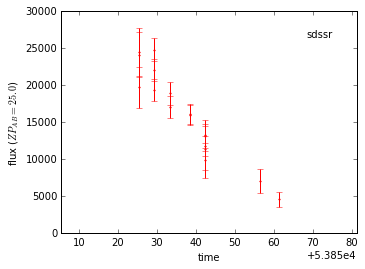

In [20]:
%matplotlib inline 
lc = lcs[3865]
#print source_distance( lc[0],ref )
fig = sncosmo.plot_lc(lc, color='red', xfigsize=10)
axes = fig.get_axes()
xlim = axes[0].get_xlim()
axes[0].set_xlim(xlim[0]-10, xlim[1]+10)

#visits = [ob[0] for ob in lc['visits']]
#fig.suptitle("object "+str(i)+":"+str(visits))
fig.show()
#i+=1

In [223]:
type(tl[0]['ra'])

lsst.afw.geom.geomLib.Angle

In [71]:
tl[0]['ra']

3.74551 rad

In [ ]:
%matplotlib inline
i = 1
for lc in lcs:
    fig = sncosmo.plot_lc(lc, color='red', xfigsize=10)
    axes = fig.get_axes()
    xlim = axes[0].get_xlim()
    axes[0].set_xlim(xlim[0]-10, xlim[1]+10)
    
    visits = [ob[0] for ob in lc['visits']]
    fig.suptitle("object "+str(i)+":"+str(visits))
    fig.show()
    i+=1

In [49]:
import re
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data = f.read()
m = re.findall('^06D3.*?\\|(.*?)\\|', data, re.MULTILINE)

In [25]:
import astropy.coordinates as coord
import astropy.units as u

c = coord.SkyCoord('14 18 47.802 +52 45 23.610', unit=(u.hourangle, u.deg))


In [50]:
m

['14 17 10.042 +53 01 29.370',
 '14 20 43.574 +52 11 27.830',
 '14 17 31.600 +52 54 44.900',
 '14 19 25.848 +52 38 27.540',
 '14 22 17.209 +52 57 27.650',
 '14 22 12.577 +52 38 27.050',
 '14 16 59.392 +52 52 57.160',
 '14 17 21.664 +52 27 10.140',
 '14 18 47.802 +52 45 23.610',
 '14 17 01.087 +52 13 56.640',
 '14 19 23.419 +53 01 22.850',
 '14 21 13.336 +52 27 21.880',
 '14 22 04.770 +52 20 18.120',
 '14 20 18.605 +52 53 49.790',
 '14 18 31.419 +52 26 34.470',
 '14 17 44.630 +52 21 40.250',
 '14 17 03.234 +52 56 10.510']

In [23]:
def source_distance(src1, src2):
    ra, dec = src1['ra'], src1['dec']
    ra2, dec2 = src2['ra'], src2['dec']
            
    return np.sqrt((float(ra)-float(ra2))**2+(float(dec)-float(dec2))**2)/3.14159*180*3600

In [54]:
import lsst.afw.geom as afwGeom
for sn in m:
    c = coord.SkyCoord(sn, unit=(u.hourangle, u.deg))
    
    try:
        x, y = wcs.skyToPixel(afwGeom.Angle(c.ra.degree, afwGeom.degrees), afwGeom.Angle(c.dec.degree, afwGeom.degrees))

        ds9.dot('o', x, y, frame=1, size=25, ctype= ds9.RED)
        i+=1
    except Exception, e:
        print e
    

In [ ]:
matches = 0
for sn in m:
    match = False
    c = coord.SkyCoord(sn, unit=(u.hourangle, u.deg))
    
    
    for i, lc in enumerate(lcs):
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance(lc[0], {'ra':c.ra.radian, 'dec':c.dec.radian}) < 2:
            match = True
            matches+=1
            print 'for object '+str(c.ra) +' '+str(c.dec)+' there is a match in curve ' +str(i)
            break
    
        #print 'no match'
print 'found ' + str(float(matches)/float(len(m))) 

In [56]:
print 'found ' + str(float(matches)/float(len(m))) 

found 0.470588235294


In [44]:
wcs.getPixelOrigin()

Point2D(488.471245, 2686.814043)

In [46]:
wcs.pixelToSky(0,0)

Fk5Coord(214.58956829296875*afwGeom.degrees, 52.920761756358175*afwGeom.degrees, 2000.0)

In [8]:
dsrcs = butler.get('deepDiff_diaSrc', {'visit': 850177 , 'filter':'r' , 'ccd':14})

In [14]:
new = dsrcs.copy()
new.clear()
a = new.addNew()

In [25]:
import lsst.afw.geom as afwGeom
a.setDec(afwGeom.Angle(1.0))
new.append(a)

In [27]:
for source in new:
    print a['coord_dec']

1 rad
1 rad
